In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
data = pd.read_csv("fake_news_tfidf.csv")
data

,aaron,abandon,abandoned,abc,abe,abedin,ability,able,abortion,abroad,...,young,younger,youre,youth,youtube,youve,zero,zika,zone,zu
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.021523,0.0,0.0,...,0.0,0.0,0.023479,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.054216,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20549,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20550,0.03389,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20551,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.023612,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20552,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.columns

Index(['aaron', 'abandon', 'abandoned', 'abc', 'abe', 'abedin', 'ability',
       'able', 'abortion', 'abroad',
       ...
       'young', 'younger', 'youre', 'youth', 'youtube', 'youve', 'zero',
       'zika', 'zone', 'zu'],
      dtype='object', length=5000)

In [4]:
# Separate features and labels
X = data.drop(columns=['label']).values
y = data['label'].values

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [7]:
X.shape

(20554, 4999)

In [8]:
y.shape

(20554,)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Classifier": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Iterate through models, train, predict, and store results
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    
    # Store results in dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report
    }
    
    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)
    print("-" * 60)

# Optionally, display results in a more structured format (optional step)


# Create DataFrame from results for easy comparison
results_df = pd.DataFrame({
    model: {
        "Accuracy": res["Accuracy"],
    } for model, res in results.items()
}).T

print("\nComparison of Model Accuracies:")
print(results_df)


Model: Logistic Regression
Accuracy: 0.9394
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2031
           1       0.93      0.95      0.94      2080

    accuracy                           0.94      4111
   macro avg       0.94      0.94      0.94      4111
weighted avg       0.94      0.94      0.94      4111

------------------------------------------------------------
Model: Naive Bayes
Accuracy: 0.8711
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2031
           1       0.91      0.83      0.87      2080

    accuracy                           0.87      4111
   macro avg       0.87      0.87      0.87      4111
weighted avg       0.87      0.87      0.87      4111

------------------------------------------------------------
Model: Support Vector Classifier
Accuracy: 0.9538
Classification Report:
               precisio

Confusion Matrix for SVC and Logistic Regression

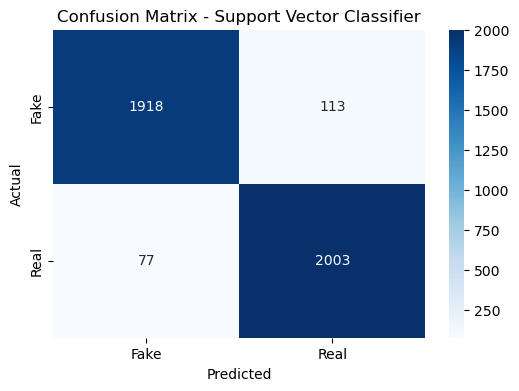

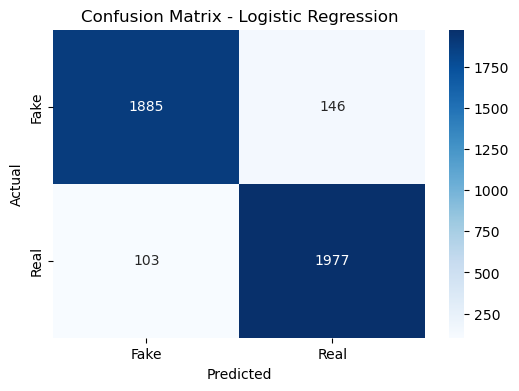

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# SVC Confusion Matrix
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svc, "Support Vector Classifier")

# Logistic Regression Confusion Matrix
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")


Hyperparameter Tuning for SVC and Logistic Regression

In [12]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Hyperparameter grid for SVC
# svc_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']  # You can also try specific values like 0.1, 1, 10
# }

# Hyperparameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']  # 'liblinear' is good for small datasets
}

# Check if training data exists
if 'X_train' in locals() and 'y_train' in locals():
    # # Grid search for SVC
    # svc_grid_search = GridSearchCV(SVC(random_state=42), svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    # svc_grid_search.fit(X_train, y_train)
    # best_svc = svc_grid_search.best_estimator_
    # print("Best parameters for SVC:", svc_grid_search.best_params_)

    # Grid search for Logistic Regression
    log_reg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    log_reg_grid_search.fit(X_train, y_train)
    best_log_reg = log_reg_grid_search.best_estimator_
    print("Best parameters for Logistic Regression:", log_reg_grid_search.best_params_)
else:
    print("Training data (X_train and y_train) is not defined. Please check your data preparation.")


Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


Confusion Matrix After Hyperparameter Tuning

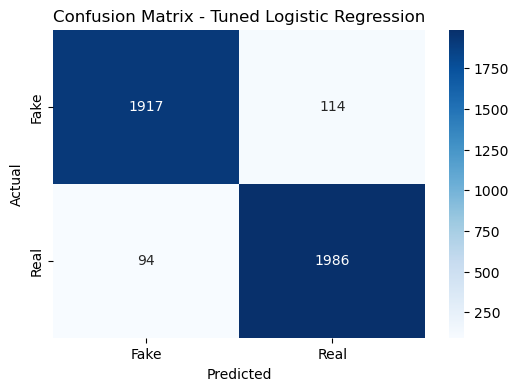

In [13]:
# # Confusion Matrix for SVC (After Tuning)
# y_pred_best_svc = best_svc.predict(X_test)
# plot_confusion_matrix(y_test, y_pred_best_svc, "Tuned Support Vector Classifier")

# Confusion Matrix for Logistic Regression (After Tuning)
y_pred_best_log_reg = best_log_reg.predict(X_test)
plot_confusion_matrix(y_test, y_pred_best_log_reg, "Tuned Logistic Regression")


In [14]:
import joblib

# Save SVM model
joblib.dump(svc, 'svm_model.joblib')
print("SVM model saved as 'svm_model.joblib'.")

# Save Logistic Regression model
joblib.dump(log_reg, 'log_reg_model.joblib')
print("Logistic Regression model saved as 'log_reg_model.joblib'.")


SVM model saved as 'svm_model.joblib'.
Logistic Regression model saved as 'log_reg_model.joblib'.


In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Load the saved models
svc = joblib.load('svm_model.joblib')
log_reg = joblib.load('log_reg_model.joblib')

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate SVC model
print("Support Vector Classifier (SVC) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

# Evaluate Logistic Regression model
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))


Support Vector Classifier (SVC) Evaluation:
Accuracy: 0.953782534663099

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2031
           1       0.95      0.96      0.95      2080

    accuracy                           0.95      4111
   macro avg       0.95      0.95      0.95      4111
weighted avg       0.95      0.95      0.95      4111

Logistic Regression Evaluation:
Accuracy: 0.9394307954269034

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2031
           1       0.93      0.95      0.94      2080

    accuracy                           0.94      4111
   macro avg       0.94      0.94      0.94      4111
weighted avg       0.94      0.94      0.94      4111



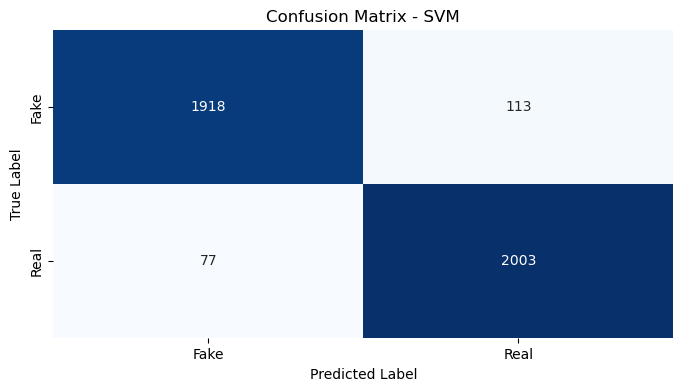

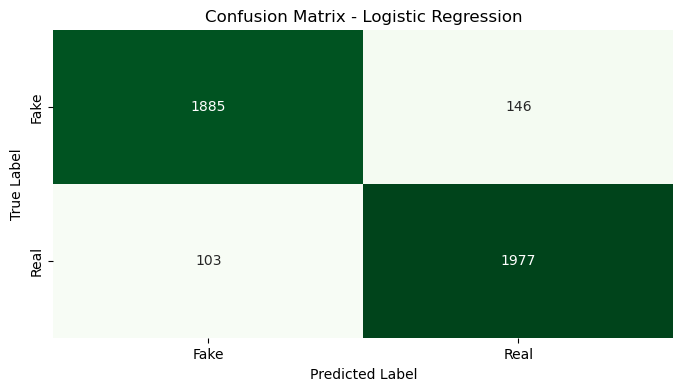

In [17]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for SVC
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


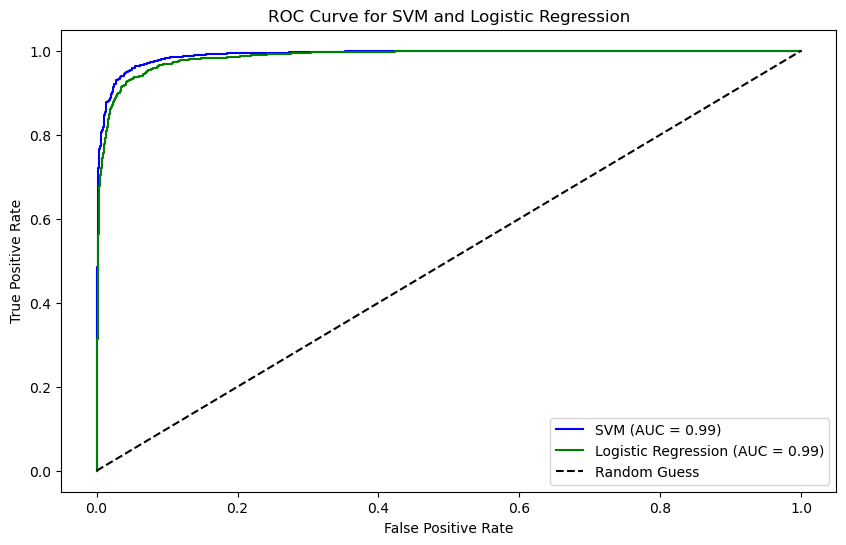

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1])

# Generate ROC curve values for SVM
svc_probs = svc.decision_function(X_test)  # get probabilities for SVM
fpr_svc, tpr_svc, _ = roc_curve(y_test_binarized, svc_probs)
roc_auc_svc = roc_auc_score(y_test_binarized, svc_probs)

# Generate ROC curve values for Logistic Regression
log_reg_probs = log_reg.decision_function(X_test)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_binarized, log_reg_probs)
roc_auc_log_reg = roc_auc_score(y_test_binarized, log_reg_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', label=f'SVM (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, color='green', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title("ROC Curve for SVM and Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


In [26]:
import nltk

# Download the Punkt tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
import joblib
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Load saved models and vectorizer
svm_model = joblib.load('svm_model.joblib')
log_reg_model = joblib.load('log_reg_model.joblib')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Check vectorizer's vocabulary size
print(f"Vocabulary size of vectorizer: {len(tfidf_vectorizer.vocabulary_)}")

# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Function to predict if news is real or fake
def predict_news(news_article):
    # Preprocess the input
    cleaned_article = preprocess_text(news_article)
    
    # Transform the input using the same vectorizer
    vectorized_article = tfidf_vectorizer.transform([cleaned_article])
    
    # Print feature count for debugging
    print(f'Number of features in input: {vectorized_article.shape[1]}')
    print(f'Number of features expected by SVC: {svm_model.n_features_in_}')
    
    # Ensure input features match the model's expected features
    if vectorized_article.shape[1] != svm_model.n_features_in_:
        raise ValueError(f"Feature mismatch: {vectorized_article.shape[1]} features in input, but SVC expects {svm_model.n_features_in_} features.")
    
    # Get predictions
    svm_prediction = svm_model.predict(vectorized_article)[0]
    log_reg_prediction = log_reg_model.predict(vectorized_article)[0]
    
    return {
        'SVM Prediction': 'Fake' if svm_prediction == 0 else 'Real',
        'Logistic Regression Prediction': 'Fake' if log_reg_prediction == 0 else 'Real'
    }

# Sample input
news_input = """Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? ... [truncated] ... Getting stood up on Election Day, like finding yourself the jilted bride on your wedding day, inspires dangerous delusions."""

# Get predictions
try:
    predictions = predict_news(news_input)
    print(predictions)
except ValueError as e:
    print(e)


Vocabulary size of vectorizer: 5000
Number of features in input: 5000
Number of features expected by SVC: 4999
Feature mismatch: 5000 features in input, but SVC expects 4999 features.


In [41]:
# Print the feature names from the vectorizer
print("Feature names in the vectorizer:")
print(tfidf_vectorizer.get_feature_names_out())

# If you have access to the training data, check for the same feature names
# For example, you could load the training dataset and vectorize it
# Note: Ensure you have the training data available to compare


Feature names in the vectorizer:
['aaron' 'abandon' 'abandoned' ... 'zika' 'zone' 'zu']


In [42]:
# Assuming `X_train` is your training data (text)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Match the feature size
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)

# Save the vectorizer for later use
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


AttributeError: 'numpy.ndarray' object has no attribute 'lower'